In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from utils_lstm import load_lstm_dfs, load_train_test_lstm
from lstm_data_prep import LstmDataPrep
from sklearn.preprocessing import StandardScaler


2024-02-27 21:24:43.299823: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
list_of_dfs=load_lstm_dfs()
train_set, test_set = load_train_test_lstm(list_of_dfs=list_of_dfs)

In [4]:
print("Train Shape: ",train_set.shape)
print("Test Shape:" ,test_set.shape)

Train Shape:  (13600, 10)
Test Shape: (37401, 10)


New Try

In [5]:
config = {
    'target_column': 'anomaly',
    'n_steps' : 5,
    'num_splits' : 34,
    }

In [6]:
model_pipe = LstmDataPrep(**config).run()

In [7]:
model_pipe

Pipeline(steps=[('transformations',
                 FeatureUnion(transformer_list=[('part_0',
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classifier',
                                                                  <lstm_model.LstmModel object at 0x10a028640>)])),
                                                ('part_1',
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classi...
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classifier',
                                                                  <lstm_model.LstmModel object at 0x11ed05f90>)])),
                                                ('part_29',
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classifier',
                                                                  <lstm_model.LstmModel object at 0x11ed05ff0>)])), ...])),
                ('processing_results', AggregateModelScores())])

In [8]:
res1 = model_pipe.fit_transform(train_set)

425/425 [==============================] - 1s 2ms/step
X.shape:  (13595, 34)


In [9]:
res1

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,...,model_27,model_28,model_29,model_30,model_31,model_32,model_33,avg_prediction,median_prediction,max_prediction
0,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
1,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
3,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
4,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13590,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0.882353,1.0,1.0
13591,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0.882353,1.0,1.0
13592,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0.882353,1.0,1.0
13593,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0.882353,1.0,1.0


In [10]:
res2 = [model_pipe.transform(df) for df in  list_of_dfs]

36/36 [==============================] - 0s 2ms/step
X.shape:  (1149, 34)
35/35 [==============================] - 0s 2ms/step
X.shape:  (1089, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1149, 34)
35/35 [==============================] - 0s 4ms/step
X.shape:  (1090, 34)
36/36 [==============================] - 0s 3ms/step
X.shape:  (1142, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1140, 34)
36/36 [==============================] - 0s 3ms/step
X.shape:  (1143, 34)
34/34 [==============================] - 0s 3ms/step
X.shape:  (1070, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1145, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1134, 34)
36/36 [==============================] - 0s 9ms/step
X.shape:  (1141, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1136, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1135, 34)
36/36 [==============================]

In [11]:
res3 = pd.concat(res2, ignore_index=True)
res3

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,...,model_27,model_28,model_29,model_30,model_31,model_32,model_33,avg_prediction,median_prediction,max_prediction
0,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
1,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
3,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
4,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37226,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0
37227,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0
37228,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0
37229,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0


In [12]:
y_pred = res3['avg_prediction']
y_pred.shape

(37231,)

In [13]:
base_preds = pd.read_csv('/Users/orenben/Documents/runi/mlops-anomaly-detection/data/lstm_baseline_predictions.csv')['y_pred']

In [14]:
len(base_preds)

37231

In [15]:
len(y_pred)

37231

In [18]:
y_test = pd.concat([df['anomaly'][5:] for df in list_of_dfs],ignore_index=True)
len(y_test)

37231

In [19]:
models_config = {
    'baseline' : {
        'y_test' :y_test.values,
        'y_pred': base_preds.values,
        'th': 0.5
    },
    
    'new_model' : {
        'y_test' :y_test.values,
        'y_pred':y_pred.values,
        'th' : 0.91
    }
}

In [20]:
models_config

{'baseline': {'y_test': array([0., 0., 0., ..., 0., 0., 0.]),
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'th': 0.5},
 'new_model': {'y_test': array([0., 0., 0., ..., 0., 0., 0.]),
  'y_pred': array([0.94117647, 0.94117647, 0.94117647, ..., 0.91176471, 0.91176471,
         0.91176471]),
  'th': 0.91}}

In [21]:
from evaluation import ModelEvaluation

In [22]:
eval = ModelEvaluation(models_config=models_config)

In [23]:
# eval.calc_metrics()

In [24]:
eval.models_config['new_model'].keys()

dict_keys(['y_test', 'y_pred', 'th'])

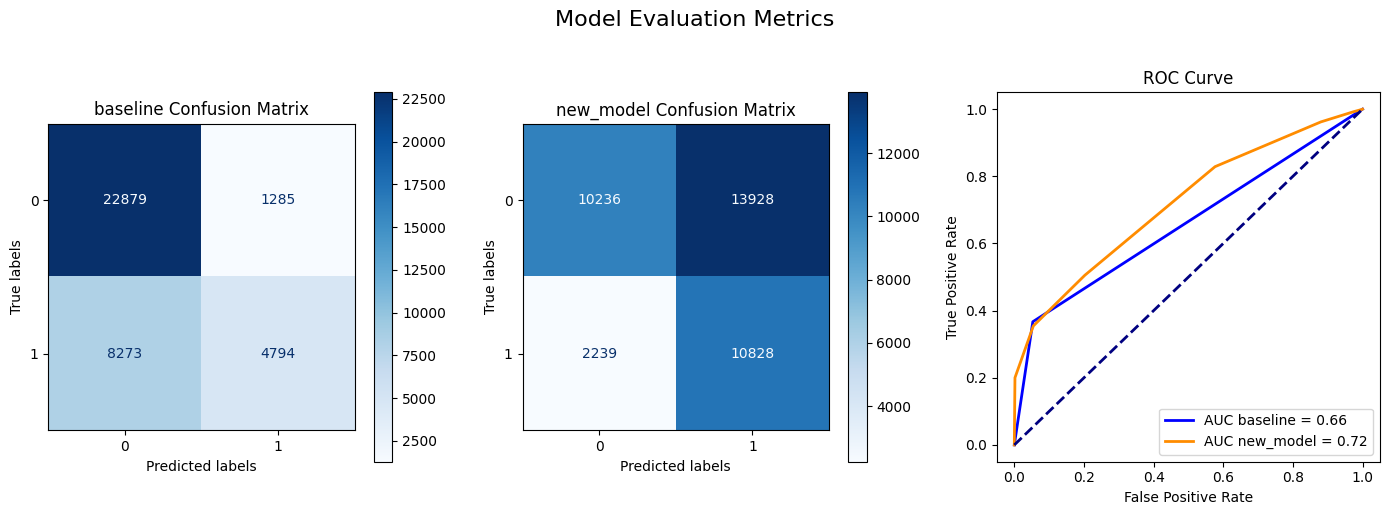

In [26]:
eval.plot_metrics()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# from sklearn.metrics import roc_curve, auc
# import numpy as np

In [ ]:
# def calc_metrics(y_true,y_pred):
#     th = 0.91
#     accuracy = accuracy_score(y_true, np.where(y_pred>=th,1,0))
#     cm = confusion_matrix(y_true, np.where(y_pred>=th,1,0))
#     f1 = f1_score(y_true, np.where(y_pred>=th,1,0))
#     fpr, tpr, thresholds = roc_curve(y_true, y_pred)
#     roc_auc = auc(fpr, tpr)
#     return accuracy,cm,f1,fpr, tpr, thresholds, roc_auc

# def plot_metrics(cm, fpr, tpr, roc_auc, thresholds, title = 'Model Evaluation Metrics'):
    
#     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
#     fig.suptitle(title, fontsize=16, y=1.02)
#     confusion_matrix_ax = ax[0]
#     roc_curve_ax = ax[1]

#     # Confusion Matrix in the first subplot
#     ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=confusion_matrix_ax,cmap='Blues')
#     confusion_matrix_ax.set_title('Confusion Matrix')
#     confusion_matrix_ax.set_xlabel('Predicted labels')
#     confusion_matrix_ax.set_ylabel('True labels')

#     # ROC Curve in the second subplot
#     roc_curve_ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
#     roc_curve_ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     roc_curve_ax.set_xlabel('False Positive Rate')
#     roc_curve_ax.set_ylabel('True Positive Rate')
#     roc_curve_ax.set_title('Receiver Operating Characteristic (ROC) Curve')
#     roc_curve_ax.legend(loc='lower right')
#     # Display the plot
#     plt.tight_layout()
#     plt.show()

In [ ]:
# accuracy, cm, f1, fpr, tpr, thresholds, roc_auc = calc_metrics(y_test,y_pred)
# plot_metrics(cm, fpr, tpr, roc_auc, thresholds, title = 'Average Probability')

In [ ]:
accuracy

In [ ]:
f1

In [ ]:
cm

## MAR

In [ ]:
2239/(2239+10828)

In [29]:
from lstm_full_model import FullLstmPipeline

In [30]:
model_config = {
    'target_column': 'anomaly',
    'n_steps' : 5,
    'num_splits' : 34,
    }

In [31]:
full_model = FullLstmPipeline(model_config)

In [32]:

preds = full_model.run()

36/36 [==============================] - 0s 3ms/step
X.shape:  (1149, 34)
35/35 [==============================] - 0s 3ms/step
X.shape:  (1089, 34)
36/36 [==============================] - 0s 3ms/step
X.shape:  (1149, 34)
35/35 [==============================] - 0s 5ms/step
X.shape:  (1090, 34)
36/36 [==============================] - 0s 3ms/step
X.shape:  (1142, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1140, 34)
36/36 [==============================] - 0s 3ms/step
X.shape:  (1143, 34)
34/34 [==============================] - 0s 2ms/step
X.shape:  (1070, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1145, 34)
36/36 [==============================] - 0s 3ms/step
X.shape:  (1134, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1141, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1136, 34)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1135, 34)
36/36 [==============================]

In [ ]:
preds